In [15]:
#Plot for the duopoly price discrimination model with loyalty and costs: Infinite horizon Mult Loyalty ML case
#this is applicable only for uniform F and when delta_a = delta_b = delta_F (hardcode)
#ta = la, tb = lb

%load_ext autoreload
%autoreload 2
from utils.imports import *
from utils.infinite_horizon import *
from utils.single_stage import get_xi_dist
from utils.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
#keep cb fixed
cb     = 0.001
ta     =   3
tb     =   2
deltaf = 0.4 #common discount function
ca_arr = np.linspace(cb,1.5,50) #np.linspace(cb,2,50) #ensure ca >= cb
_,F,f    = get_xi_dist('uniform')
ca_m_cb_arr = ca_arr - cb

In [29]:
paa_arr,pba_arr,pbb_arr,pab_arr,xia_arr,xib_arr,constraint_aa_ba_arr,constraint_bb_ab_arr, \
    vaopt_diff_arr,vbopt_diff_arr = get_prices_xis_constraints_and_vs(ca_arr,cb,ta,tb,F,f,deltaf)

/Users/theja/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


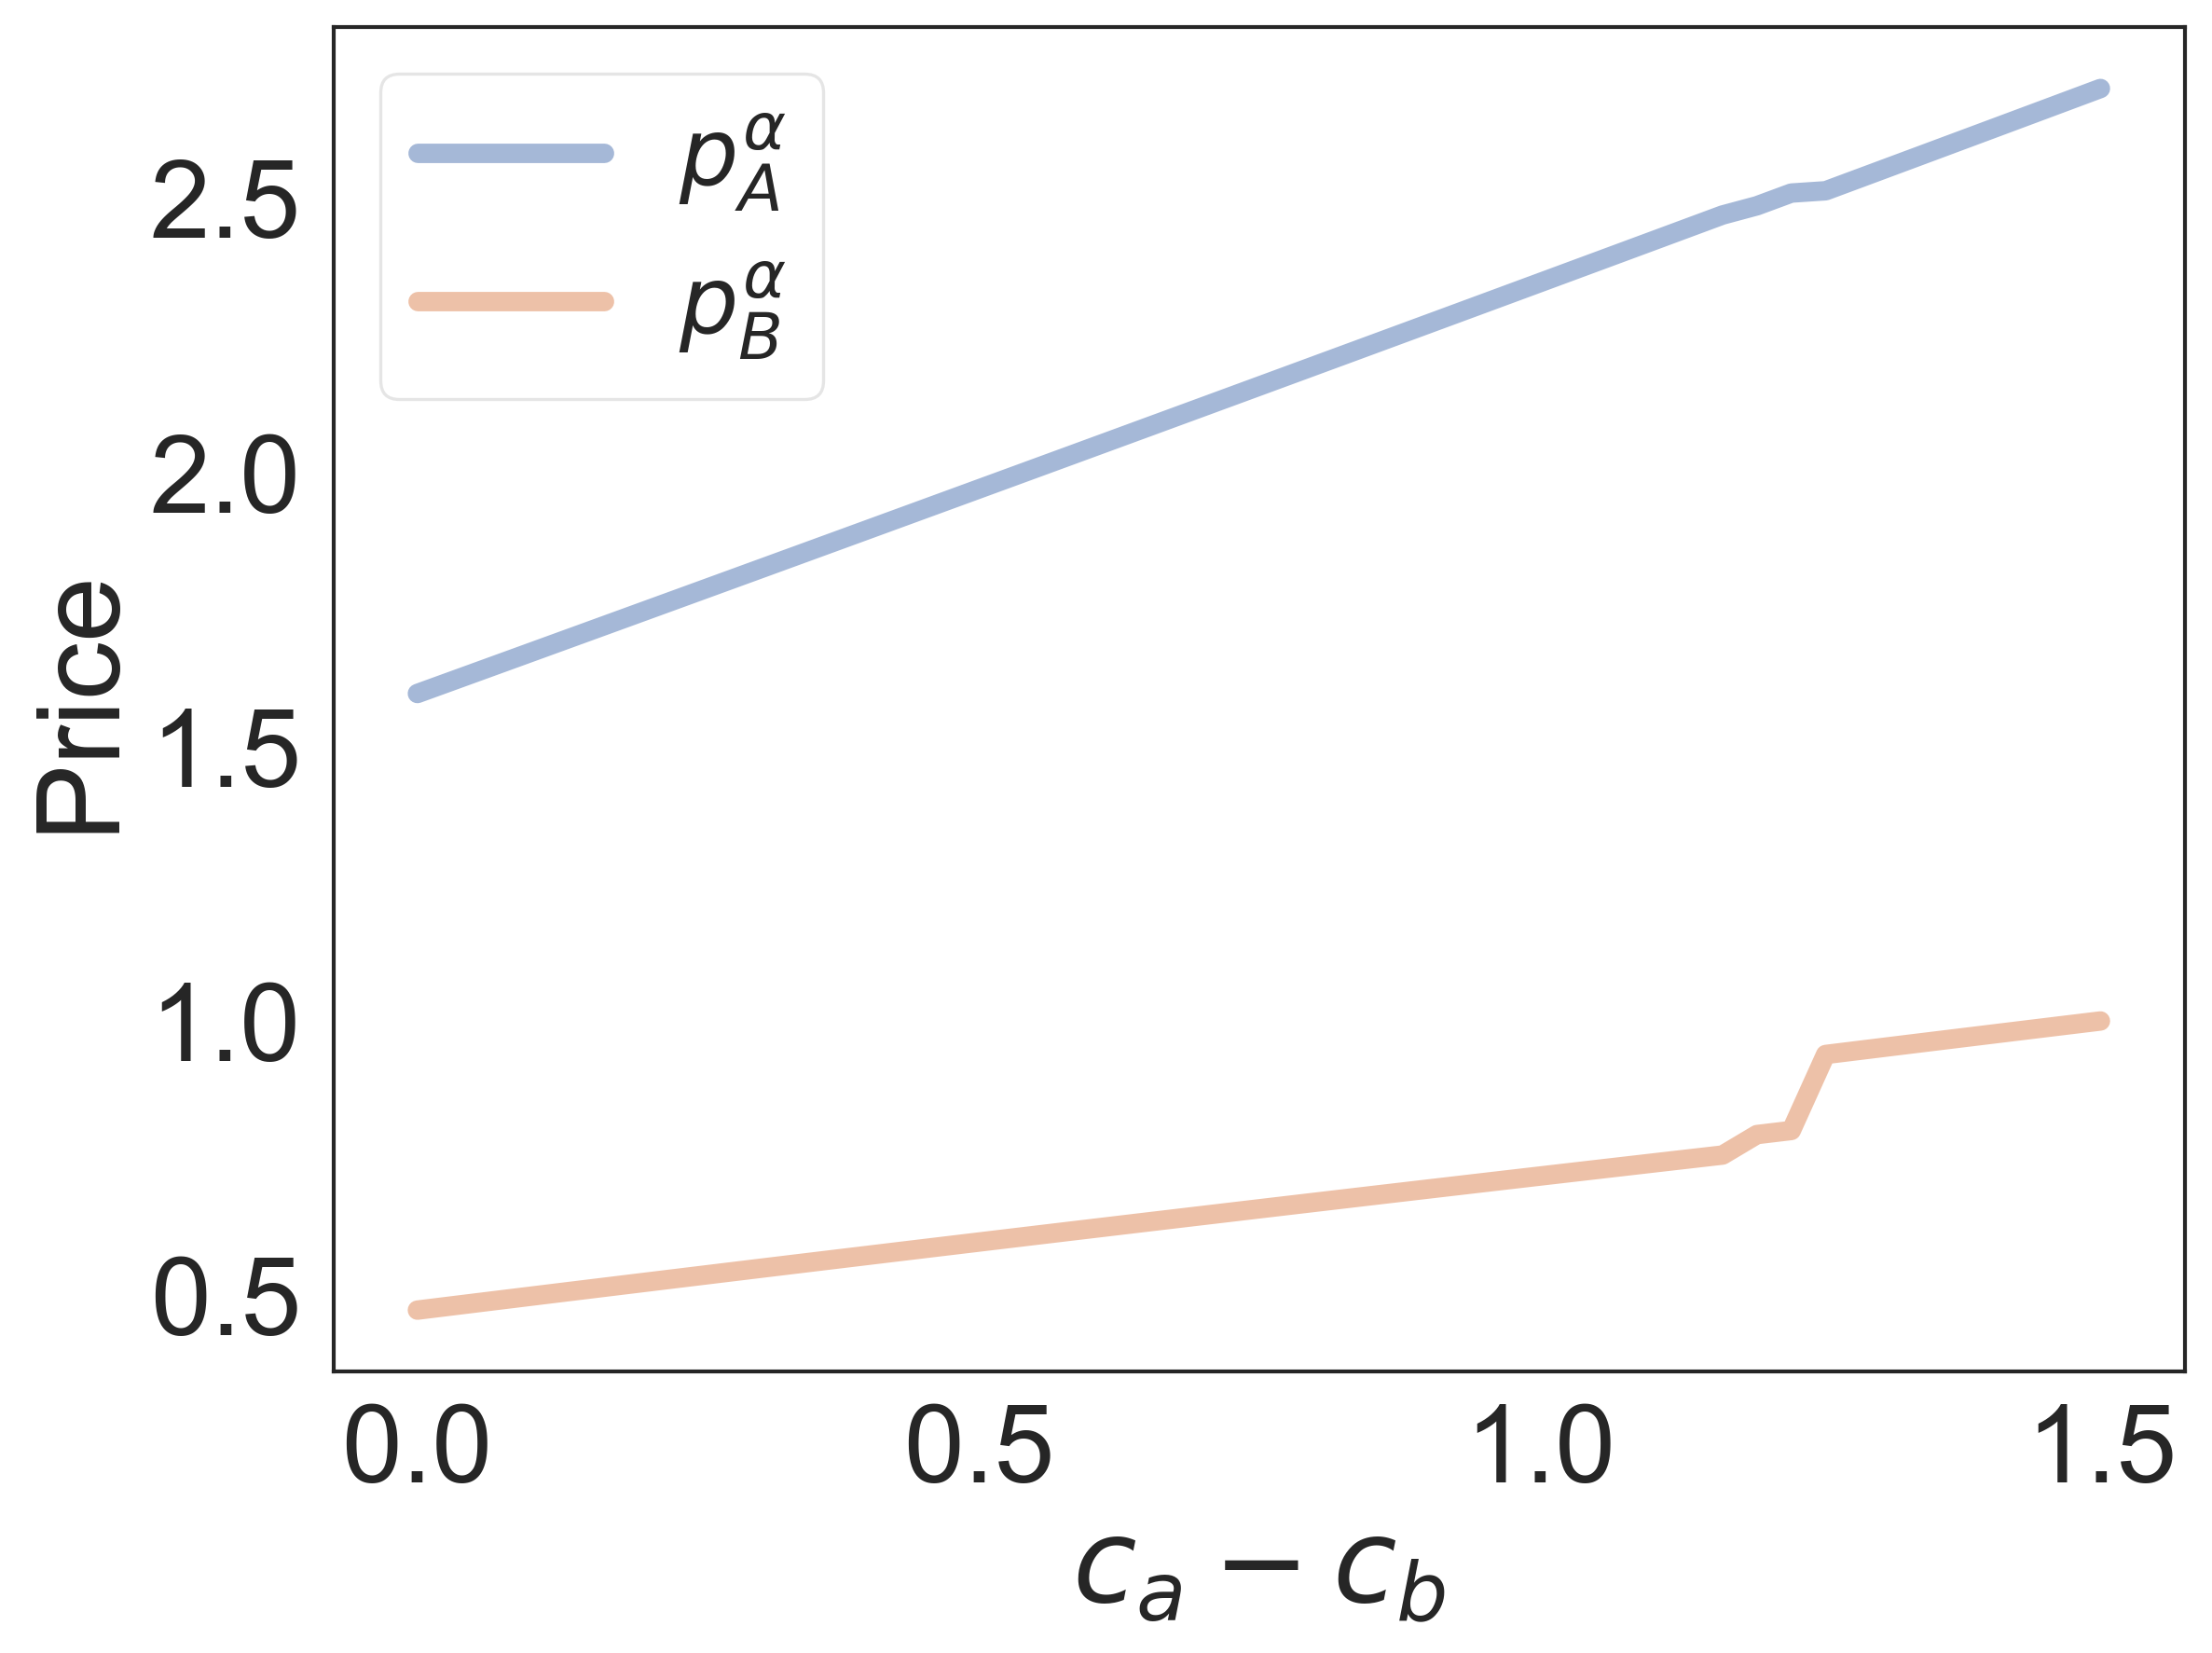

In [30]:
# plot of prices paa and pba
labels1=[r'$p_{A}^{\alpha}$',r'$p_{B}^{\alpha}$']
fname_prices_a = "./output/ml_ih_fm_paa_pba.png"
plot_curves_vs_camcb(paa_arr,pba_arr,ca_m_cb_arr,'Price',labels1,None,None,fname_prices_a)

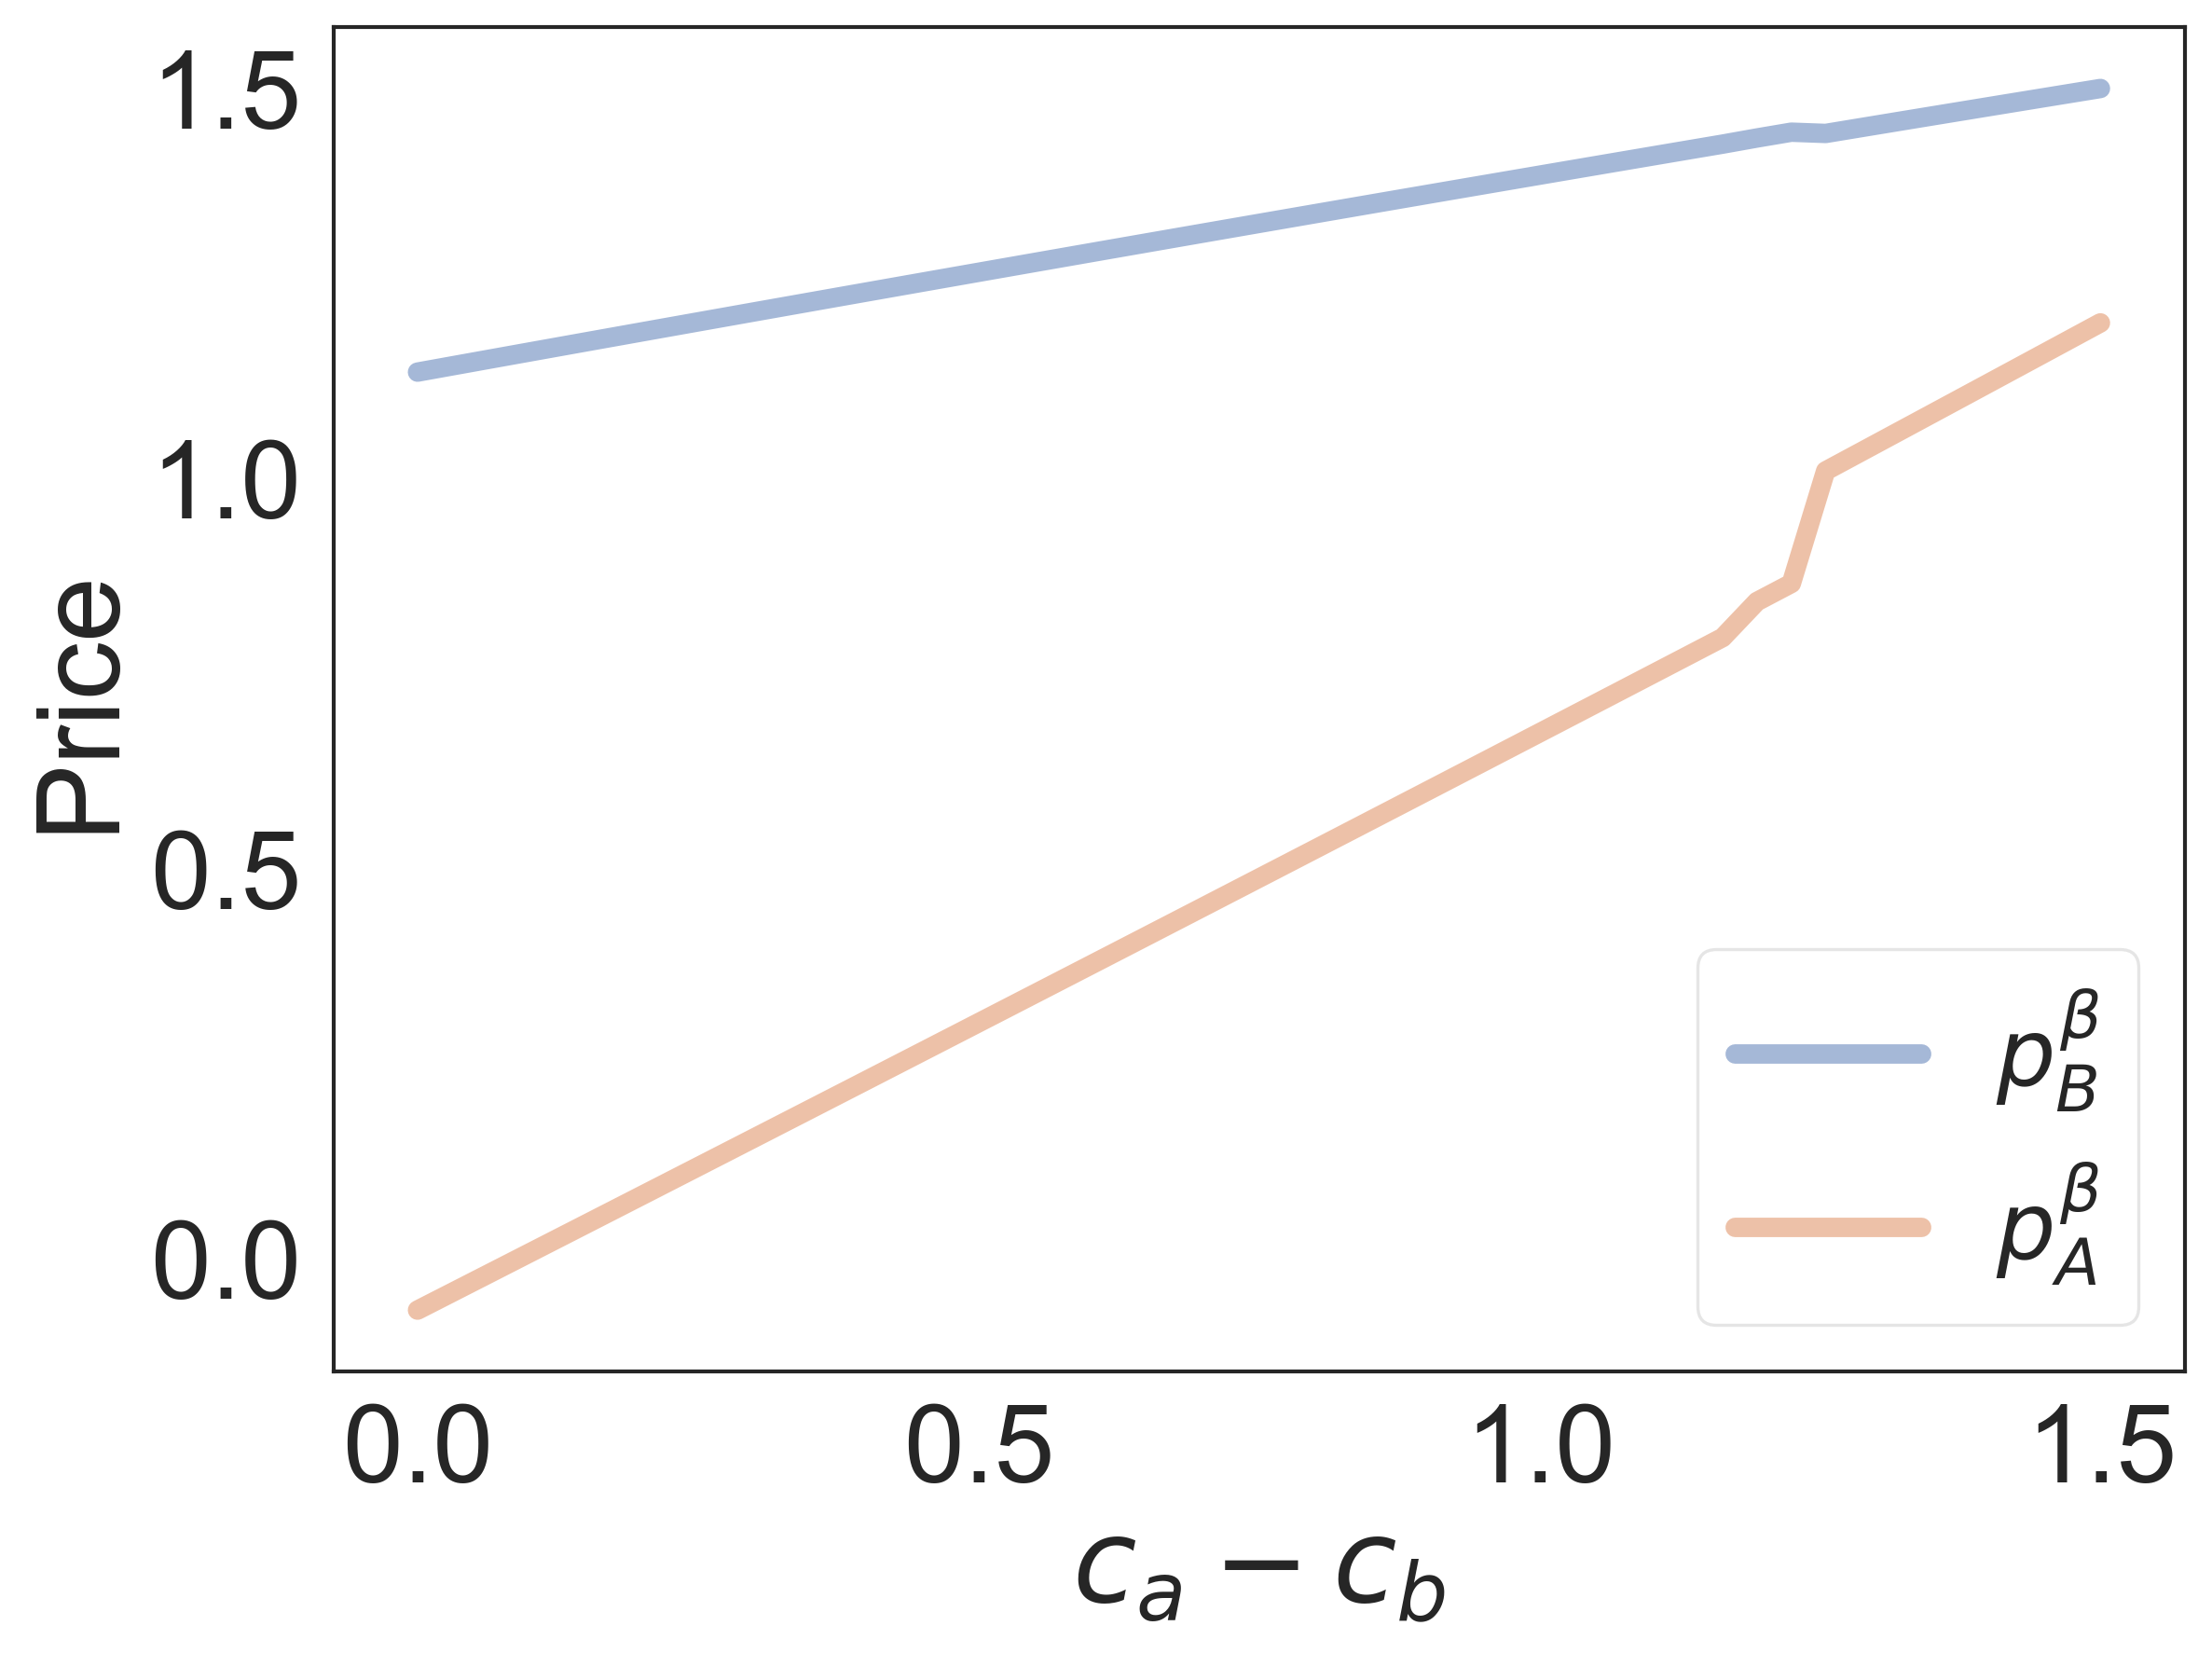

In [31]:
# plot of prices pbb and pab
labels2=[r'$p_{B}^{\beta}$',r'$p_{A}^{\beta}$']
fname_prices_b = "./output/ml_ih_fm_pbb_pab.png"
plot_curves_vs_camcb(pbb_arr,pab_arr,ca_m_cb_arr,'Price',labels2,None,None,fname_prices_b)

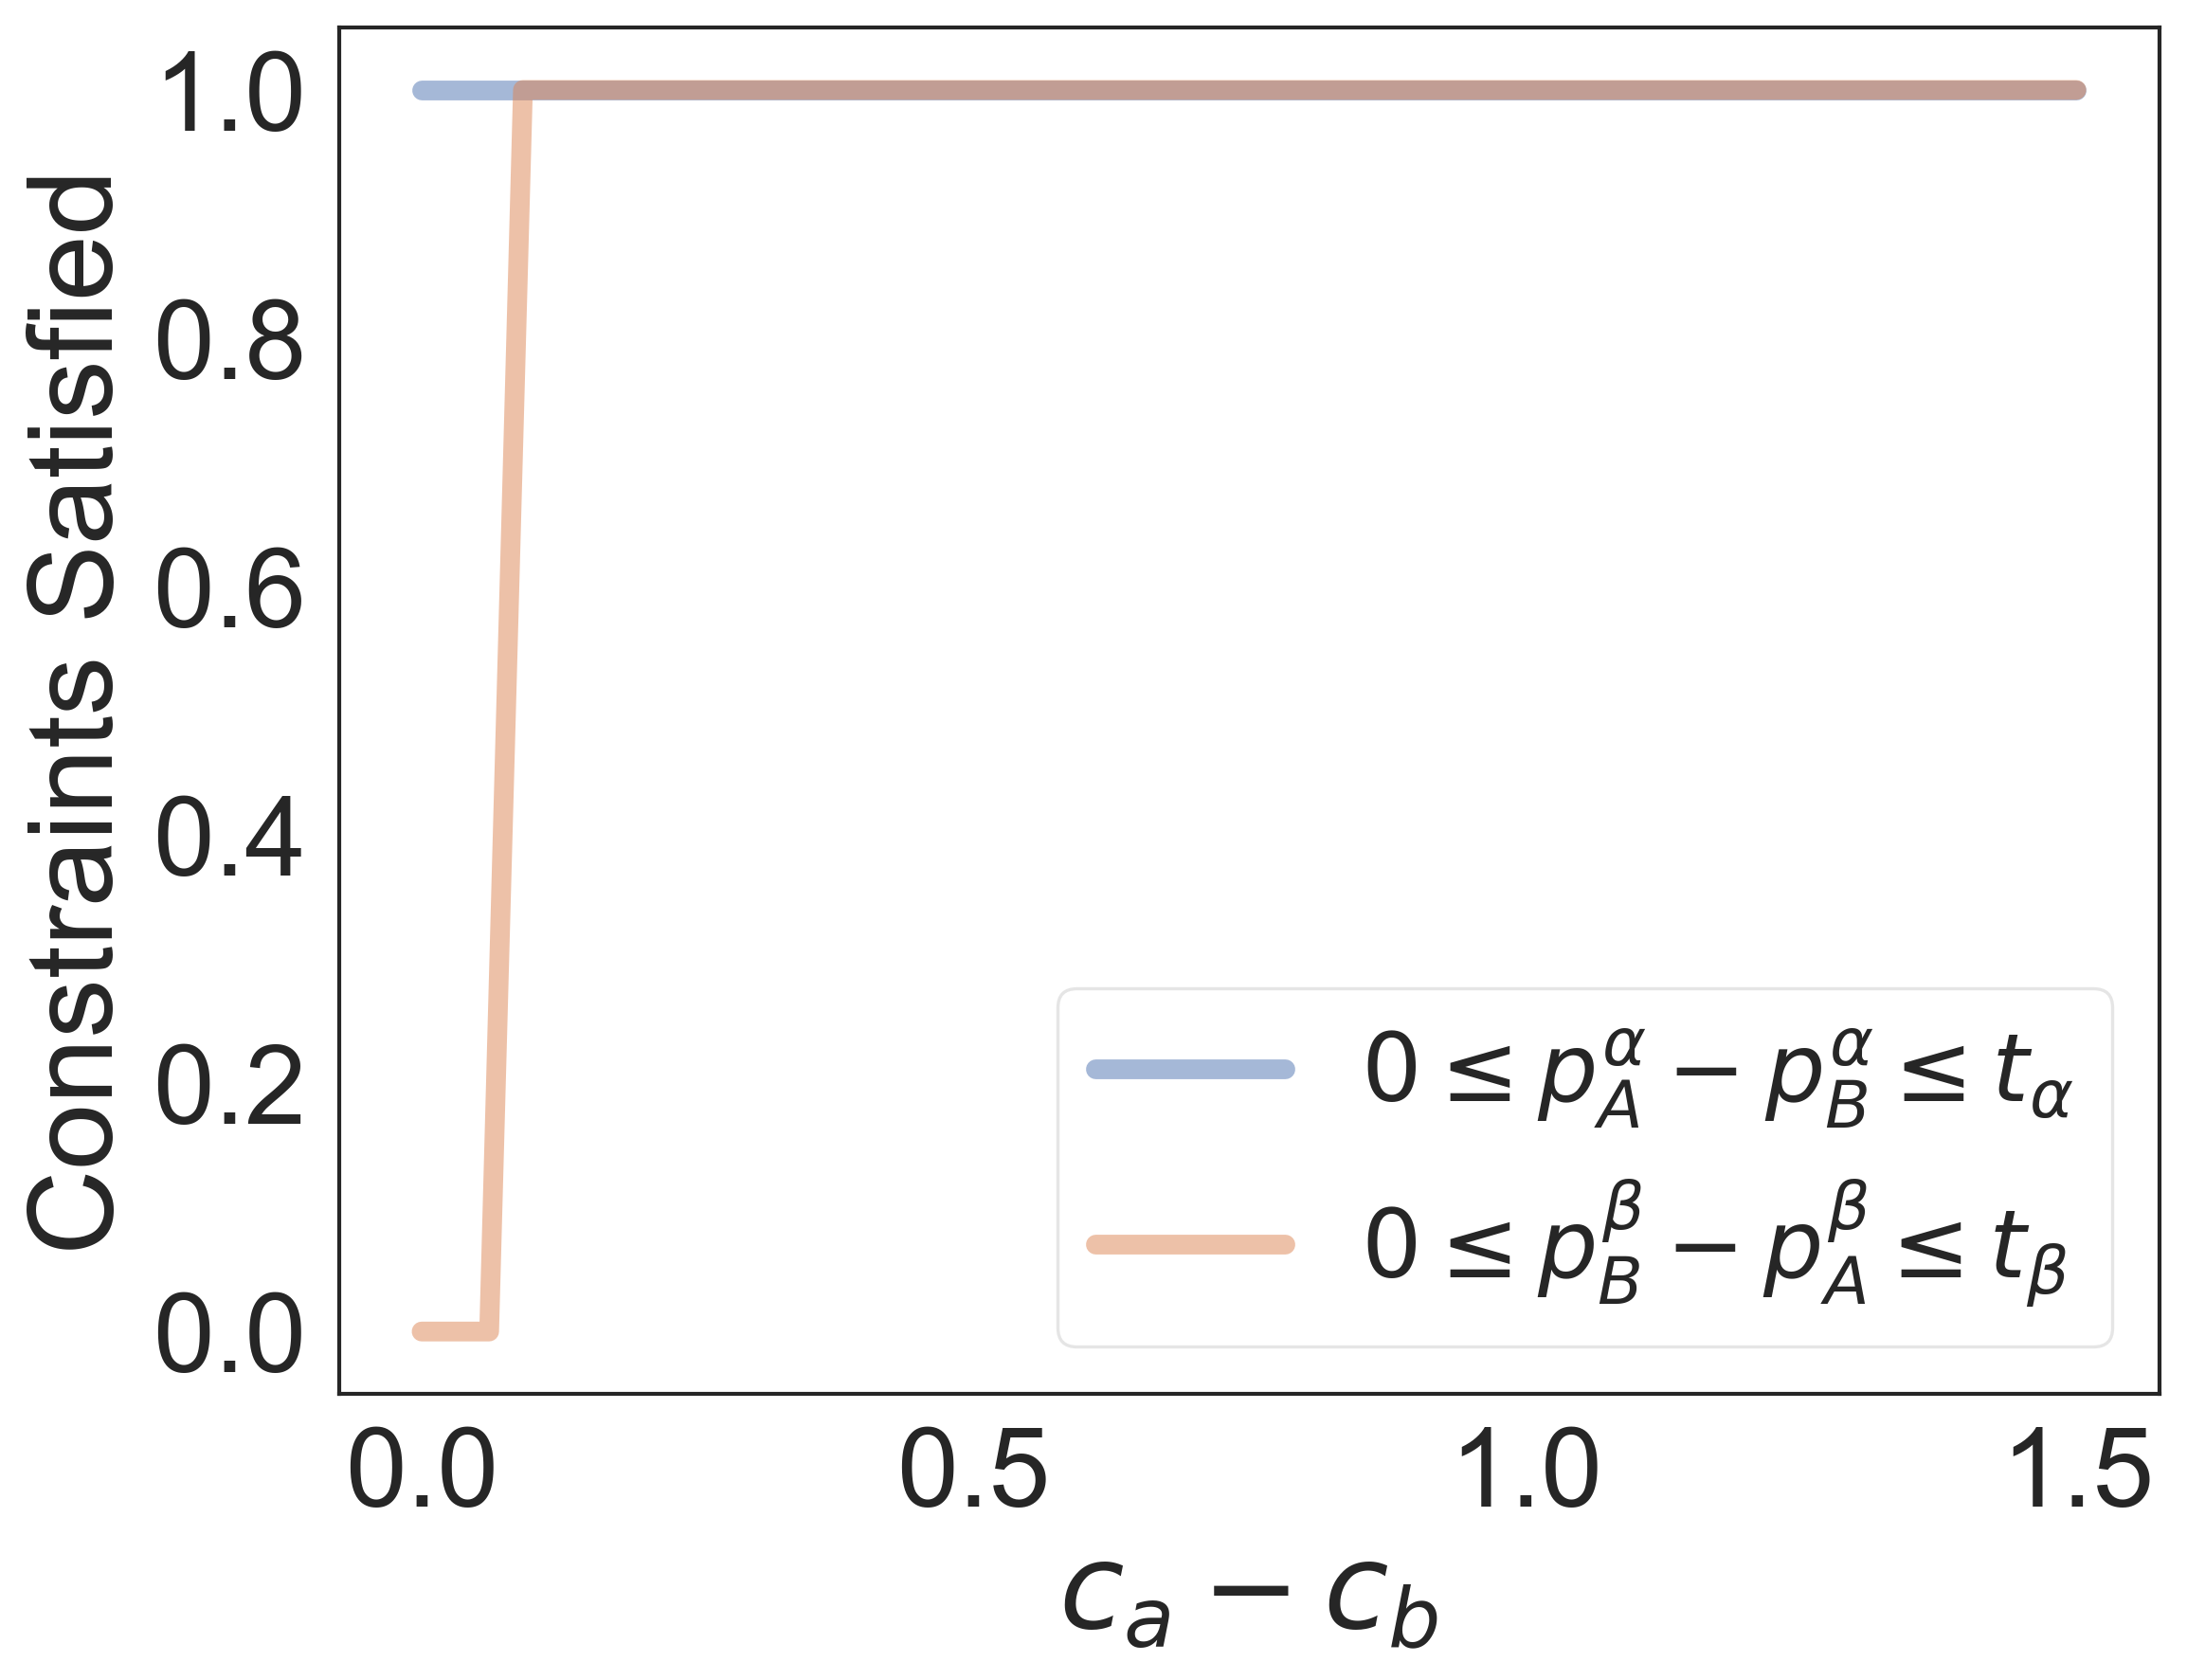

In [32]:
# plot of price constraints indicator functions
labels3=[r'$0 \leq p_{A}^{\alpha} - p_{B}^{\alpha} \leq t_{\alpha}$',r'$0 \leq p_{B}^{\beta} - p_{A}^{\beta} \leq t_{\beta}$']
fname_constraints = "./output/ml_ih_fm_constraints.png"
plot_curves_vs_camcb(constraint_aa_ba_arr,constraint_bb_ab_arr,ca_m_cb_arr,'Constraints Satisfied',labels3,None,None,fname_constraints)

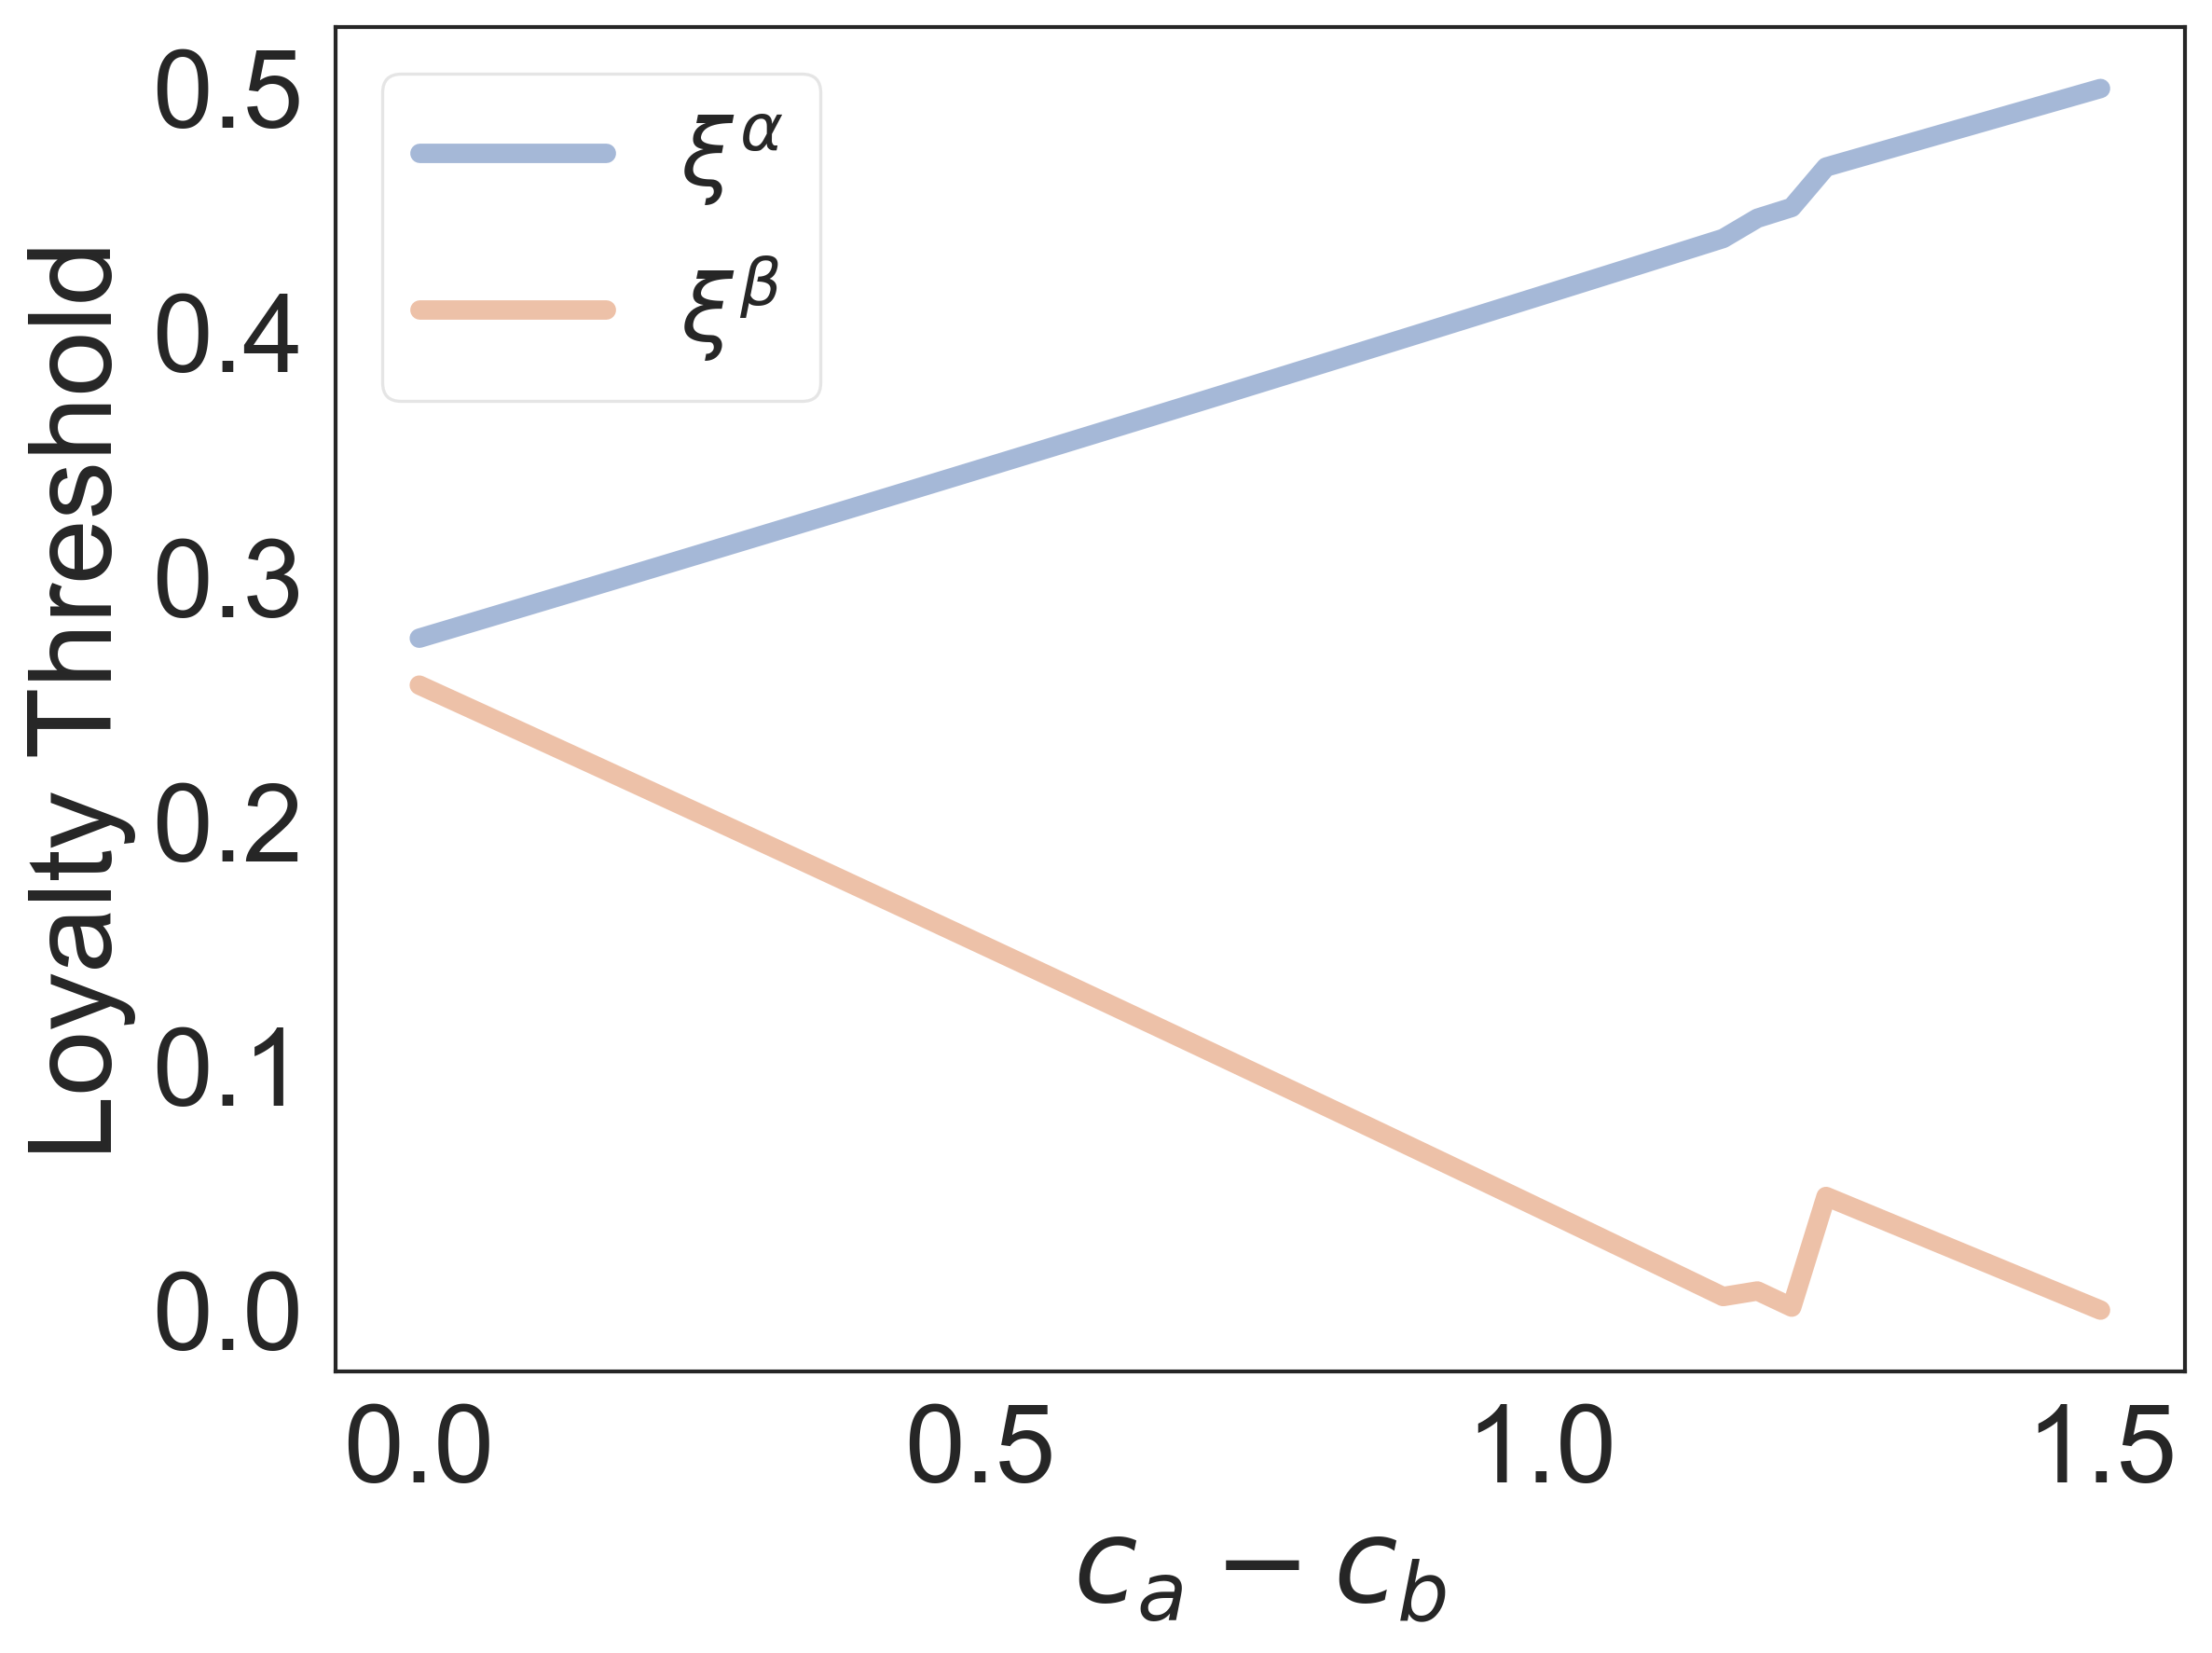

In [33]:
# plot of xia and xib
labels4=[r'$\xi^{\alpha}$',r'$\xi^{\beta}$']
fname_xis = "./output/ml_ih_fm_xis.png"
plot_curves_vs_camcb(xia_arr,xib_arr,ca_m_cb_arr,'Loyalty Threshold',labels4,None,None,fname_xis)

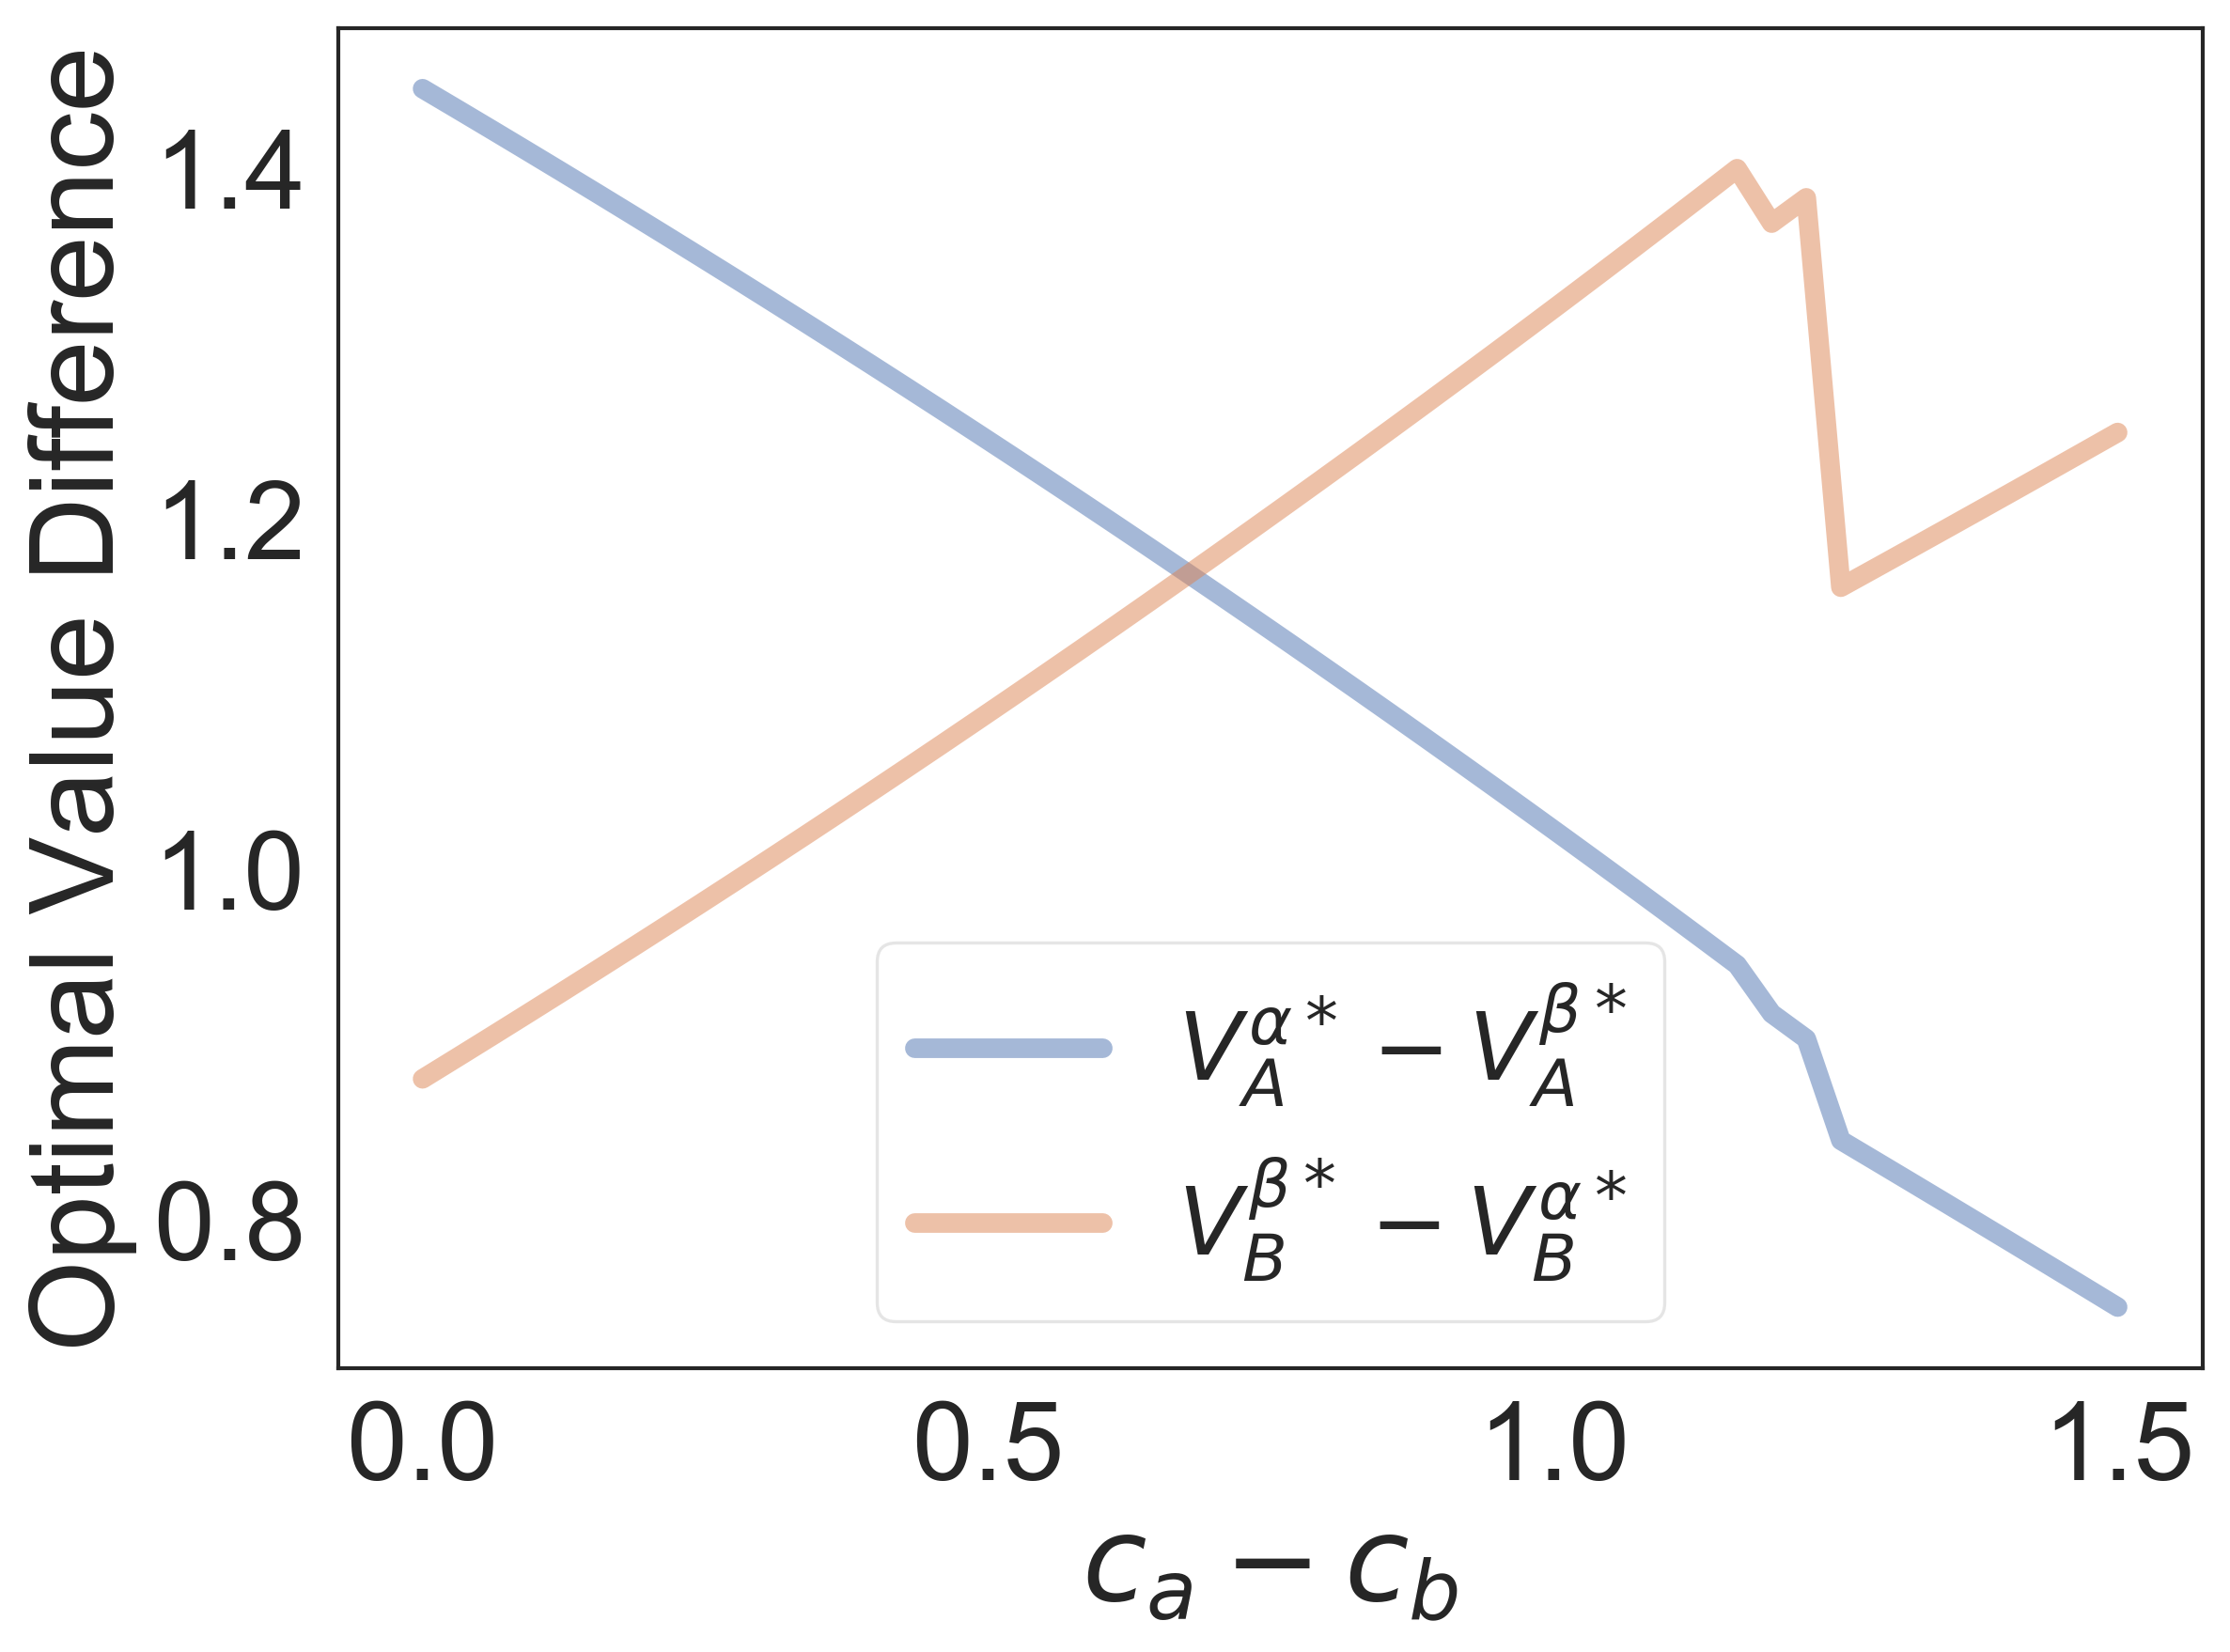

In [34]:
# plot of opt value differences
labels5=[r'$V_{A}^{\alpha*} - V_{A}^{\beta*}$',r'$V_{B}^{\beta*} - V_{B}^{\alpha*}$']
plot_curves_vs_camcb(vaopt_diff_arr,vbopt_diff_arr,ca_m_cb_arr,'Optimal Value Difference',labels5,None,None,None)